In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart.sample(5)  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
317,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
692,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
value=heart['restecg'].unique
value

<bound method Series.unique of 0       1
1       0
2       1
3       1
4       1
       ..
1020    1
1021    0
1022    0
1023    0
1024    1
Name: restecg, Length: 1025, dtype: int64>

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart.shape

(1025, 14)

In [11]:
heart.duplicated().sum()

723

In [12]:
# heart.drop_duplicates(inplace= True)
# heart.duplicated().sum()

In [13]:
heart.shape

(1025, 14)

In [14]:
#1-disease 0-non-disease
heart['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

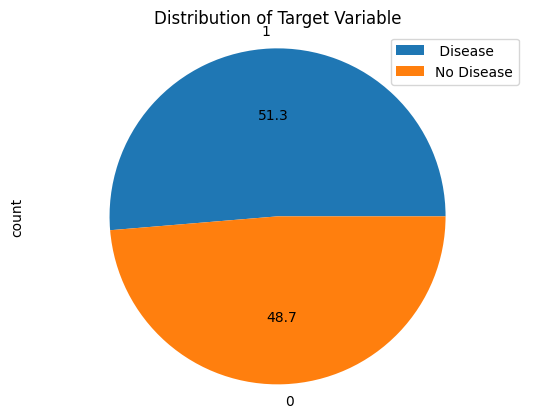

In [15]:
heart['target'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Distribution of Target Variable')
plt.legend([' Disease', 'No Disease'])
plt.axis('equal')
plt.show()

in this dataset Male--->1  and  Female--->0

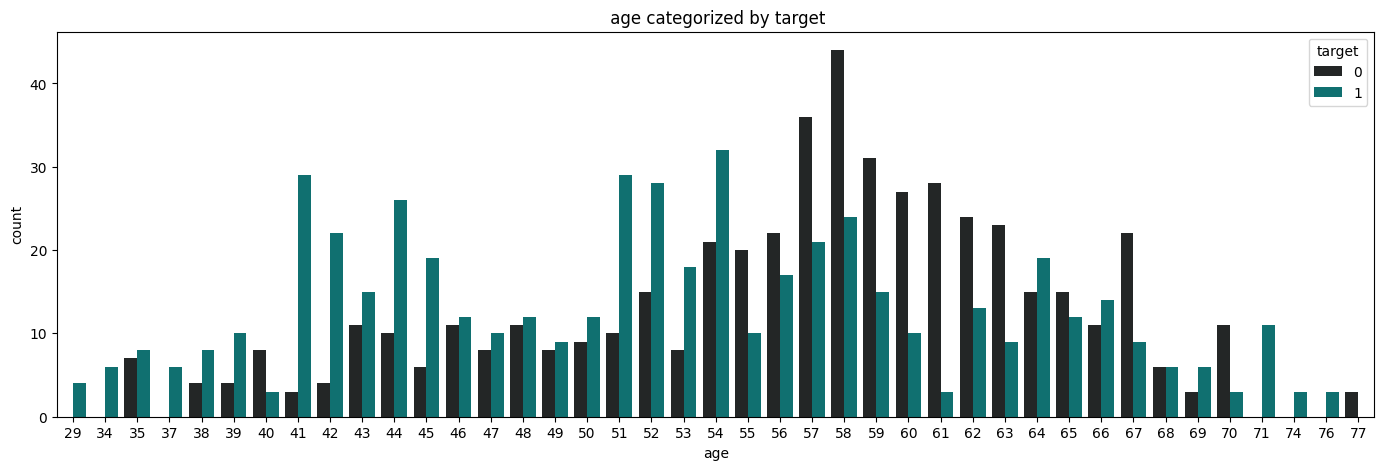

In [16]:
plt.figure(figsize=(17,5))
title = ' age categorized by target'
plt.title(title)
sns.countplot(x = 'age' , data= heart , hue = 'target',palette='dark:teal')
plt.show()

In [17]:
# bins = [0, 29, 41, 47, 52, 57, 62, 67, 77]
# labels = ['0-29', '30-41', '42-47', '48-52', '53-57', '58-62', '63-67', '68-77']
# plt.figure(figsize=(13, 5))
# title = 'Age Categorized by Gender'
# plt.title(title)
# heart['AgeGroup'] = pd.cut(heart['age'], bins=bins, labels=labels)
# sns.countplot(x='AgeGroup', data=heart, hue='sex')
# plt.xlabel('Age Group')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()

<Axes: >

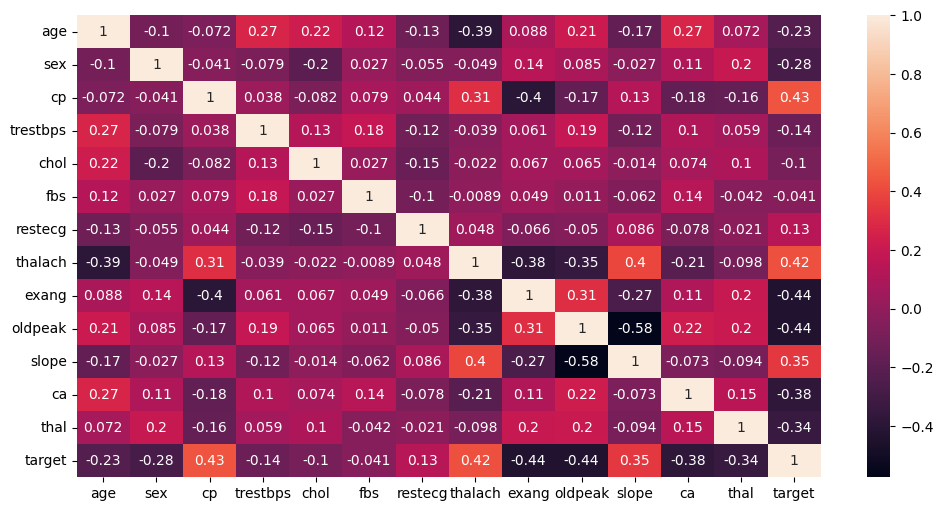

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(heart.corr(),annot=True)

In [19]:
heart=heart.drop(columns='fbs',axis=1)

In [20]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [21]:
heart.corr()['target']

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

In [22]:
unique_values = heart['cp'].unique()
print("Unique values in the 'chest pain' column:", unique_values)

Unique values in the 'chest pain' column: [0 1 2 3]


<Axes: xlabel='cp'>

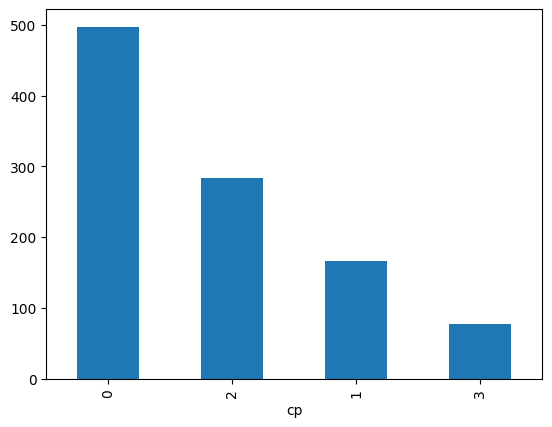

In [23]:
heart['cp'].value_counts().plot(kind='bar')

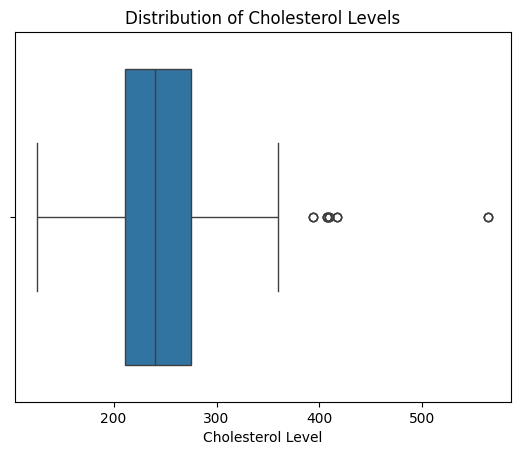

In [24]:
#box plot for the 'chol' column
sns.boxplot(x=heart['chol'])
plt.xlabel('Cholesterol Level')
plt.title('Distribution of Cholesterol Levels')
plt.show()


In [25]:
heart['chol'].median()

240.0

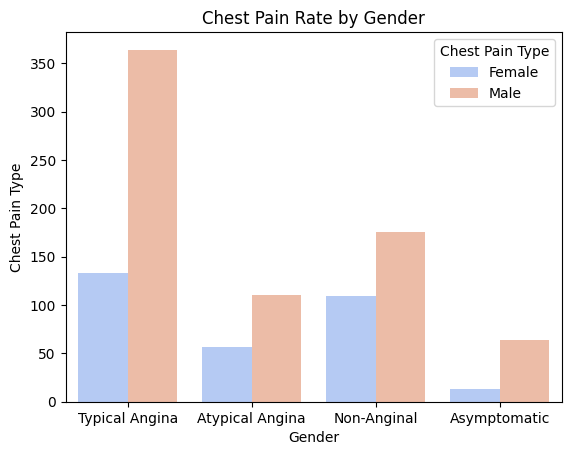

In [26]:
bins = [1, 2, 3]
labels = ['Female' , 'Male']
title = 'Chest Pain Rate by Gender'
plt.title(title)
heart['Gender'] = pd.cut(heart['sex'], bins=bins, labels=labels)
sns.countplot(x='cp', data=heart, hue='sex', palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Chest Pain Type')
plt.xticks(ticks=[0,3,2,1],labels=['Typical Angina', 'Asymptomatic', 'Non-Anginal', 'Atypical Angina'])
legend_labels =['Female', 'Male']
plt.legend(title='Chest Pain Type', labels=legend_labels)
plt.show()

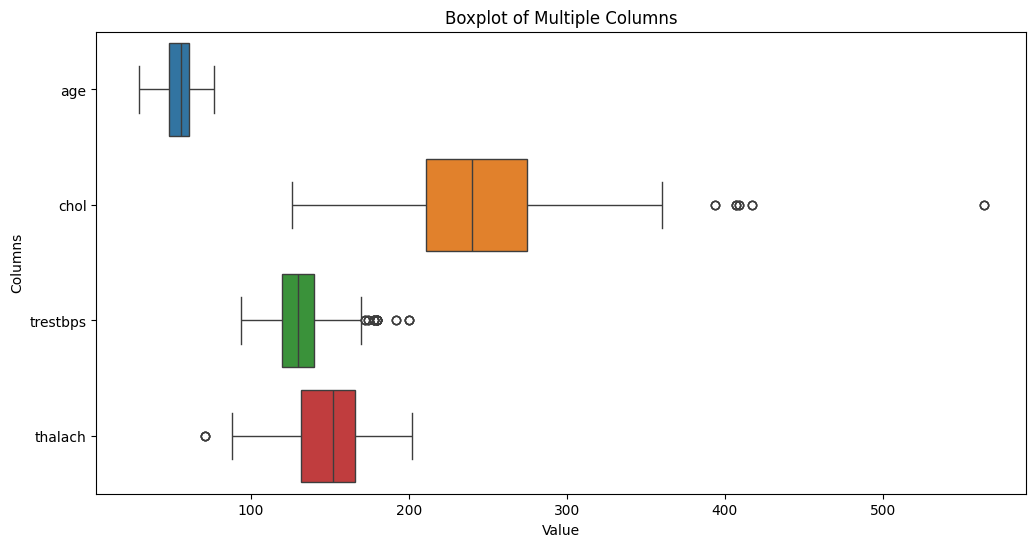

In [27]:
columns_to_check = ['age', 'chol', 'trestbps','thalach']
plt.figure(figsize=(12, 6))
sns.boxplot(heart[columns_to_check], orient='h')
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()


Checking the distribution of Numerical data

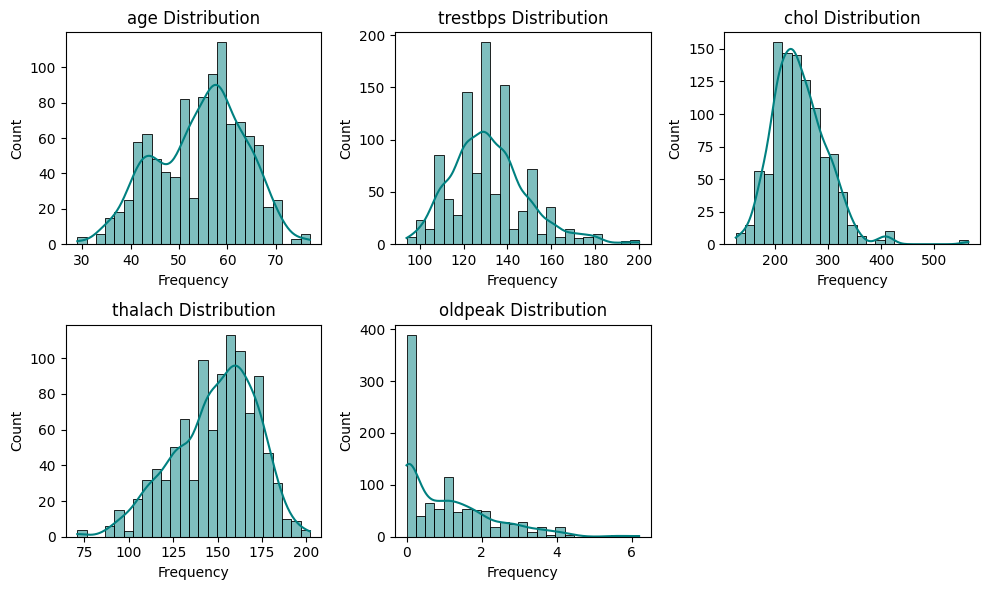

In [28]:
plt.figure(figsize=(10,6))
num_features = ['age','trestbps','chol','thalach','oldpeak']

for i,column in enumerate(num_features):
    plt.subplot(2,3,i+1)
    sns.histplot(heart[column] ,color='teal',kde=True,bins=25)
    plt.title(f'{column} Distribution')
    #plt.xlabel(f'{column}')
    plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [29]:
column_mean = heart['thalach'].mean()
print("Mean of the column:", column_mean)

Mean of the column: 149.11414634146342


In [30]:
# float_number = 149.56953642384107
# int_number = int(149.56953642384107)
# print(int_number) 

In [31]:
# column_max = heart['thalach'].max()
# print("Max of the column:", column_max)


Checking the distribution of categorical feature

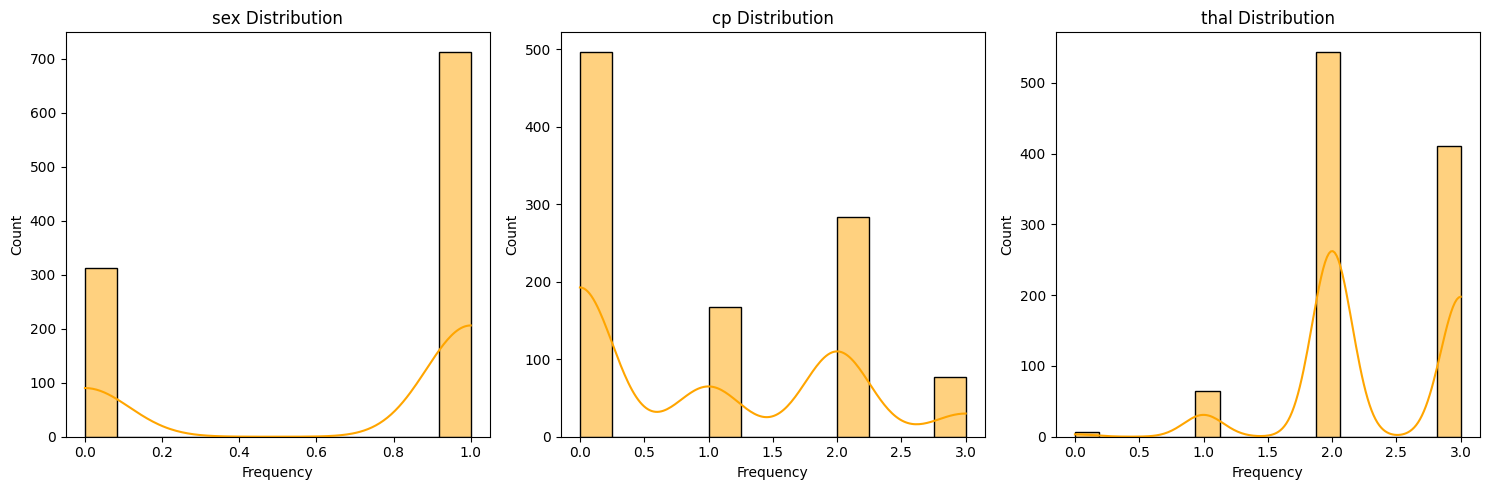

In [32]:
plt.figure(figsize=(15,5))
cat_features = ['sex','cp','thal']

for i,column in enumerate(cat_features):
    plt.subplot(1,3,i+1)
    sns.histplot(heart[column] ,color='orange',kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

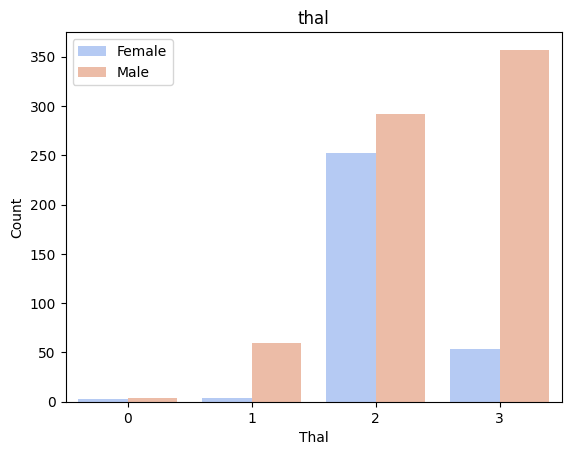

In [33]:
plt.title('thal')
plt.xticks(ticks=[0,1,2,3] )
sns.countplot(x='thal', hue='sex',data=heart , palette='coolwarm')
plt.xlabel('Thal')
plt.ylabel('Count')
plt.legend(['Female','Male'])
plt.show()

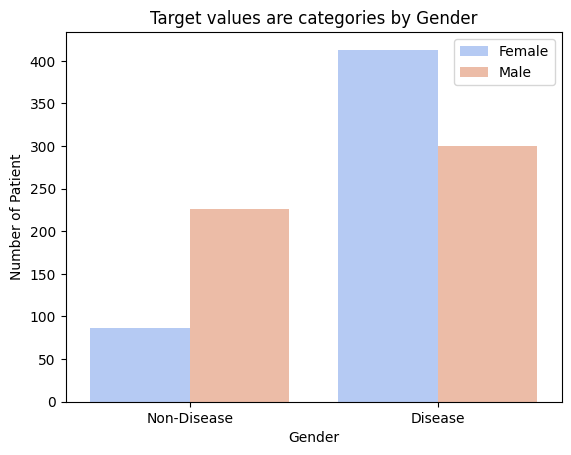

In [34]:
fig = sns.countplot(x ='sex' , data = heart , palette='coolwarm' , hue='target')
plt.xticks(ticks=[1, 0], labels=['Disease', 'Non-Disease'])
plt.title('Target values are categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patient')
plt.legend(['Female' , 'Male'])
plt.show()

In [35]:
#trestbps
heart[heart['trestbps']!=0]

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0,NaN
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0,NaN
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0,NaN
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0,NaN
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,164,1,0.0,2,0,2,1,NaN
1021,60,1,0,125,258,0,141,1,2.8,1,1,3,0,NaN
1022,47,1,0,110,275,0,118,1,1.0,1,1,2,0,NaN
1023,50,0,0,110,254,0,159,0,0.0,2,0,2,1,NaN


In [36]:
heart['trestbps'].isnull().sum()

0

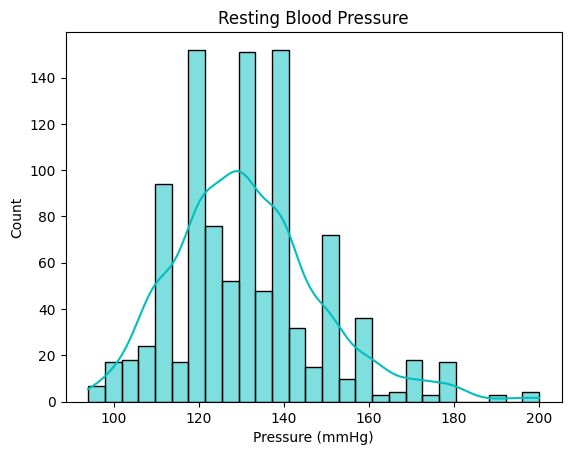

In [37]:
palette = 'coolwarm'

sns.histplot(data=heart,x='trestbps',kde=True,color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')

In [38]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   int64   
 2   cp        1025 non-null   int64   
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   restecg   1025 non-null   int64   
 6   thalach   1025 non-null   int64   
 7   exang     1025 non-null   int64   
 8   oldpeak   1025 non-null   float64 
 9   slope     1025 non-null   int64   
 10  ca        1025 non-null   int64   
 11  thal      1025 non-null   int64   
 12  target    1025 non-null   int64   
 13  Gender    0 non-null      category
dtypes: category(1), float64(1), int64(12)
memory usage: 105.3 KB


In [39]:
heart.drop(columns=['Gender'], inplace=True)


# Logistic Regression

In [40]:
X=heart.drop(columns='target',axis=1)
Y=heart['target']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [42]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1025, 12) (820, 12) (205, 12)


In [44]:
model = LogisticRegression()

In [45]:
#training the LogisticRegression model with training data

model.fit(X_train,Y_train)

C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8524390243902439


In [48]:
# accuracy of test data
X_test_prediction=model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8048780487804879


Building predictive system

In [49]:
input = (71	,0	,0	,112,	149	,1	,125	,0	,1.6,	1	,0	,2)
input_data=np.asarray(input)

In [50]:
reshaped_data=input_data.reshape(1,-1)
reshaped_data

array([[ 71. ,   0. ,   0. , 112. , 149. ,   1. , 125. ,   0. ,   1.6,
          1. ,   0. ,   2. ]])

In [51]:
prediction= model.predict(reshaped_data)
prediction

C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
if(prediction[0]==0):
    print('The person does not have heart disease')
else:
    print('The person has Heart disease')

The person has Heart disease


# SVM 

In [53]:
from sklearn import svm

In [54]:
Y = heart['target']
X = heart.drop('target',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
clf = svm.SVC()


In [55]:
clf.fit(X_train, y_train)

SVC()

In [56]:
y_pred=clf.predict(X_train)

In [57]:
print(accuracy_score(y_train, y_pred))

0.691771269177127


In [58]:
y_pred=clf.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_pred))

0.75


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size=0.2, stratify=Y, random_state=2)
rf_model = RandomForestClassifier(n_estimators=80,max_depth=4, random_state=5)

rf_model.fit(X_train, Y_train)

y_train_pred = rf_model.predict(X_train) 
training_accuracy = accuracy_score(y_train_pred, Y_train)
print("Accuracy on training Data:", training_accuracy) 


y_test_pred= rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test_pred, Y_test)
print("Accuracy on test Data:", test_accuracy)

Accuracy on training Data: 0.9024390243902439
Accuracy on test Data: 0.848780487804878


In [61]:
input_data = [[71, 0, 0, 112, 149, 1, 125, 0, 1.6, 1, 0, 2]]
prediction = rf_model.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease')
else:
    print('The person has Heart disease')

The person has Heart disease


C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
cr = classification_report(y_train_pred, Y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       365
           1       0.95      0.87      0.91       455

    accuracy                           0.90       820
   macro avg       0.90      0.91      0.90       820
weighted avg       0.91      0.90      0.90       820



In [63]:
cr1 = classification_report(y_test_pred, Y_test)
print(cr1)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        91
           1       0.90      0.82      0.86       114

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



# Decision Tree

In [64]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size=0.2, stratify=Y, random_state=2)

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=10,max_depth=5)
dt_model.fit(X_train, Y_train)

y_train_pred =dt_model.predict(X_train)
training_accuracy = accuracy_score(y_train_pred, Y_train) 
print("Accuracy on Train Data:", training_accuracy)

y_test_accuracy= accuracy_score(y_test_pred,Y_test)
print("Accuracy on Test Data: ",test_accuracy)

Accuracy on Train Data: 0.9365853658536586
Accuracy on Test Data:  0.848780487804878


In [66]:
input_data = [[71, 0, 0, 112, 149, 1, 125, 0, 1.6, 1, 0, 2]]
prediction = dt_model.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease')
else:
    print('The person has Heart disease')

The person has Heart disease


C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
cr = classification_report(y_train_pred, Y_train)

In [68]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       399
           1       0.94      0.94      0.94       421

    accuracy                           0.94       820
   macro avg       0.94      0.94      0.94       820
weighted avg       0.94      0.94      0.94       820



In [69]:
cr1 = classification_report(y_test_pred, Y_test)

In [70]:
print(cr1)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        91
           1       0.90      0.82      0.86       114

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [71]:
print(confusion_matrix(y_test_pred, Y_test))

[[80 11]
 [20 94]]
